In [1]:
import sys
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

> **Example: Tossing coins**

Let $\theta \in [0,1]$ be the chance that some coin comes up heads, an event we denote by $Y = 1$. Suppose we toss a coin $N$ times, and we record the outcomes as:

$$
\mathcal{D} = \{y_n \in \{0, 1\} : n = 1 : N \}
$$

We want to compute $p(\theta|\mathcal{D})$, which represents our beliefs about the parameter after collecting the data. To compute the posterior, we can use Bayes’ rule.

The likelihood has the form:

$$
p(\mathcal{D}|\theta) = \prod_{n=1}^{N} \theta^{y_n} (1 - \theta)^{1 - y_n} = \theta^{N_1} (1 - \theta)^{N_0} = \text{Beta}(\theta|N_1+1, N_0+1)
$$

where we have defined:

$$
N_1 = \sum_{n=1}^{N} \mathbb{1} (y_n = 1), \quad N_0 = \sum_{n=1}^{N} \mathbb{1} (y_n = 0)
$$

representing the number of heads and tails. These counts are called the **sufficient statistics** of the data, since this is all we need to know about $\mathcal{D}$ to infer $\theta$.  
The total count, $N = N_0 + N_1$, is called the **sample size**.

Let us assume we know nothing about the parameter, except that it lies in the interval $[0, 1]$.  
We can represent this uninformative prior using a uniform distribution:

$$
p(\theta) = \text{Unif}(\theta | 0, 1) = \text{Beta}(\theta|1,1)
$$

More generally, we will write the prior using a **beta distribution**.


In [2]:

x = np.linspace(0,1,100)

def get_pdf(x, alpha, beta):
    return scipy.stats.beta.pdf(x, alpha, beta)

In [10]:
def plot_pdfs(n0, n1, alpha, beta, ax):
    prior = get_pdf(x, alpha, beta)
    likelihood = get_pdf(x, n1+1, n0+1)
    posterior = scipy.stats.beta.pdf(x, alpha+n1, beta+n0)
    ax.plot(x, prior, "black", label=f"prior Beta({alpha},{beta})")
    ax.plot(x, likelihood, "r", linestyle="dotted", label=f"likelihood Beta({n1+1},{n0+1})")
    ax.plot(x, posterior, "b--", label=f"posterior Beta({alpha+n1},{beta+n0})")
    ax.legend()
    ax.set_title(f"n0={n0}, n1={n1}, alpha={alpha}, beta={beta}")

We can compute the posterior by multiplying the likelihood by the prior:

$$
p(\theta | \mathcal{D}) \propto \theta^{N_1} (1 - \theta)^{N_0} \theta^{\alpha - 1} (1 - \theta)^{\beta - 1}
\propto \text{Beta}(\theta \mid \alpha' + N_1, \beta' + N_0)
$$

where $\alpha' = \alpha + N_1$ and $\beta' = \beta + N_0$ are the parameters of the posterior.  
Since the posterior has the same functional form as the prior, we say that it is a **conjugate prior**.

For example, suppose we observe $N_1 = 4$ heads and $N_0 = 1$ tail.
If we use a uniform prior, we get the posterior as below.
Not surprisingly, this has exactly the same shape as the likelihood (but is scaled to integrate to 1 over the range $[0, 1]$).

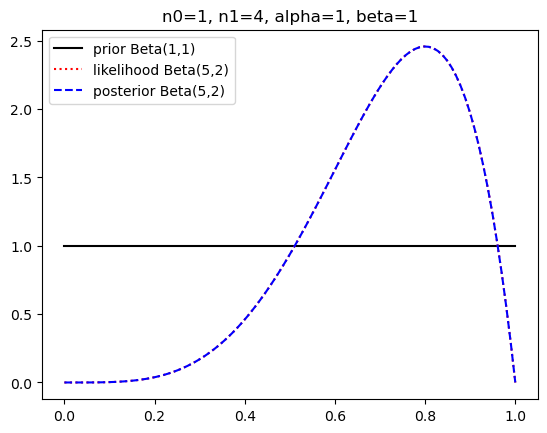

In [ ]:
fig, ax = plt.subplots()
plot_pdfs(n0=1, n1=4, alpha=1, beta=1, ax=ax)

Now suppose we use a prior that has a slight preference for values of $\theta$ near to $0.5$, reflecting our prior belief that it is more likely than not that the coin is fair.  
We will make this a weak prior by setting $\alpha = \beta = 2$.  
The effect of using this prior is illustrated in below.  
We see the posterior is a compromise between the prior and the likelihood.

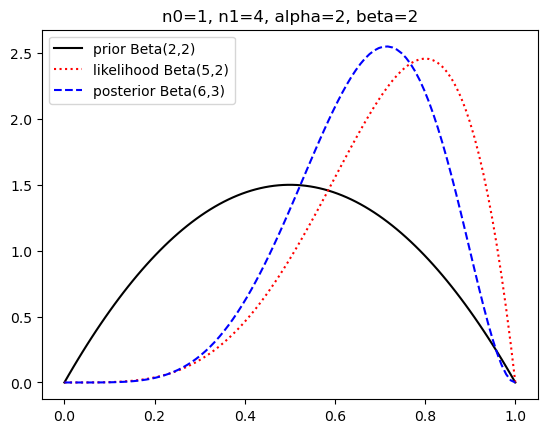

In [ ]:
fig, ax = plt.subplots()
plot_pdfs(n0=1, n1=4, alpha=2, beta=2, ax=ax)

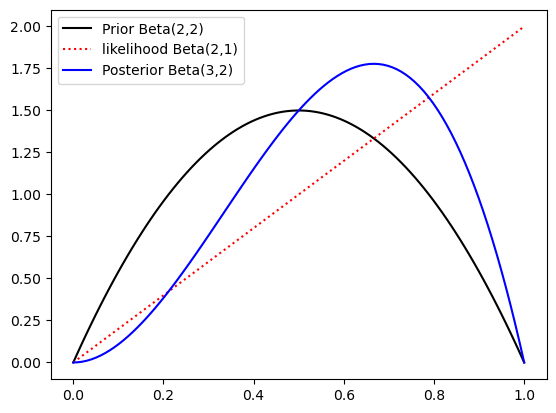

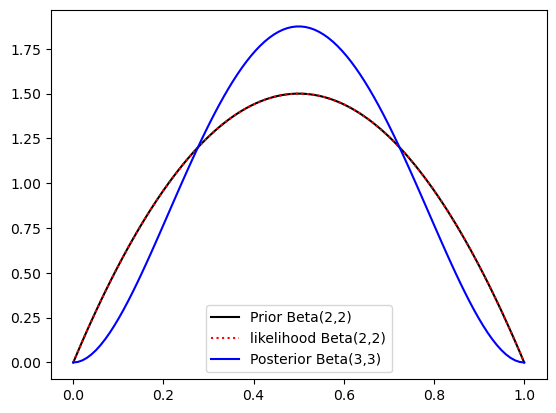

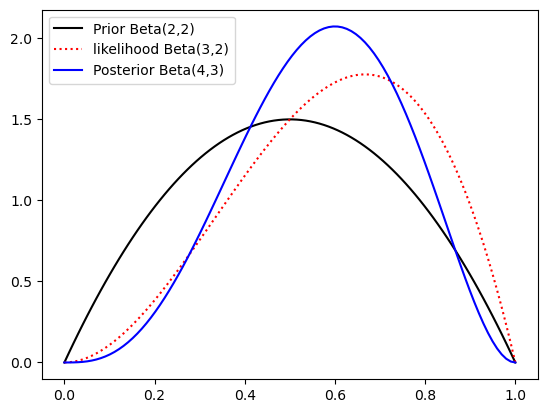

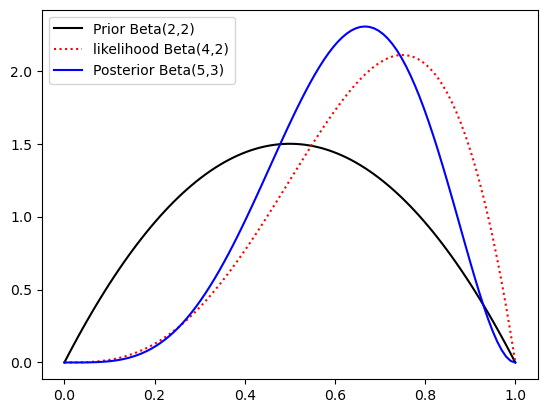

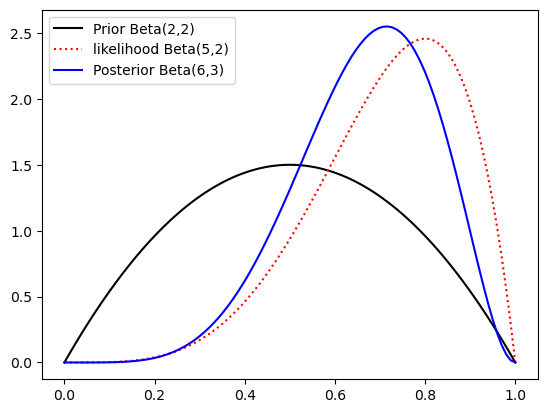

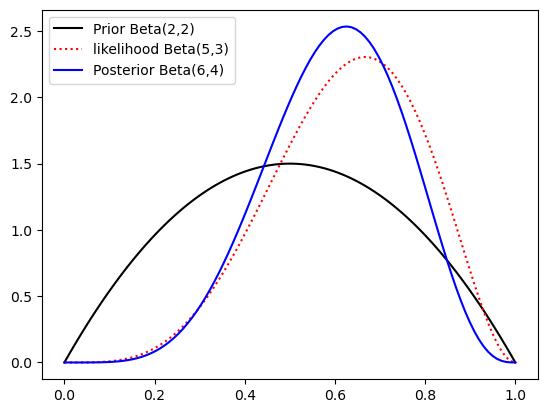

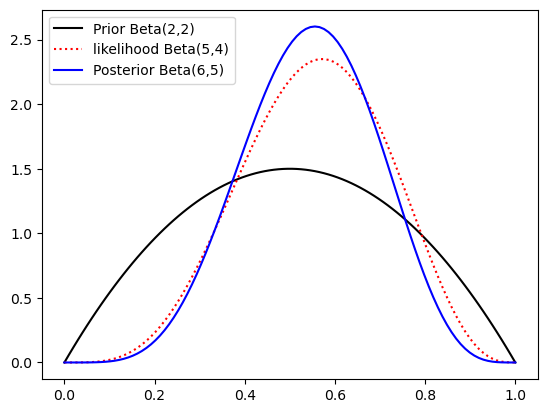

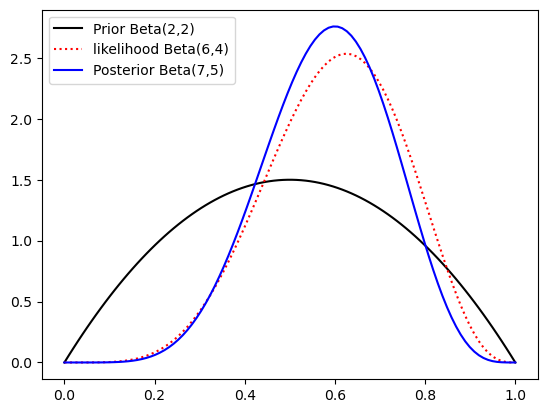

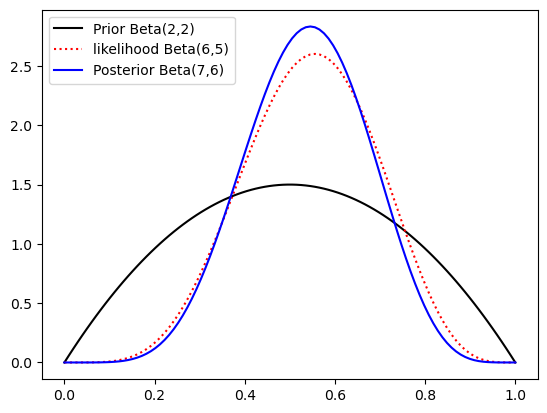

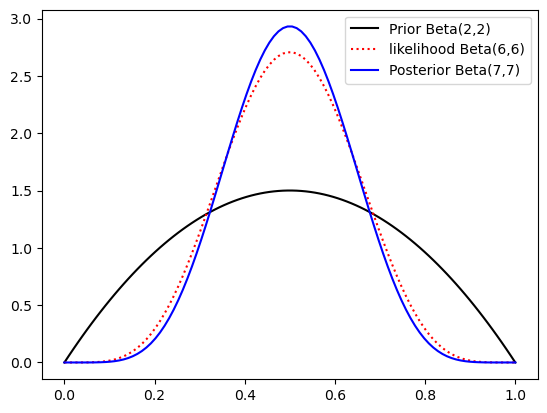

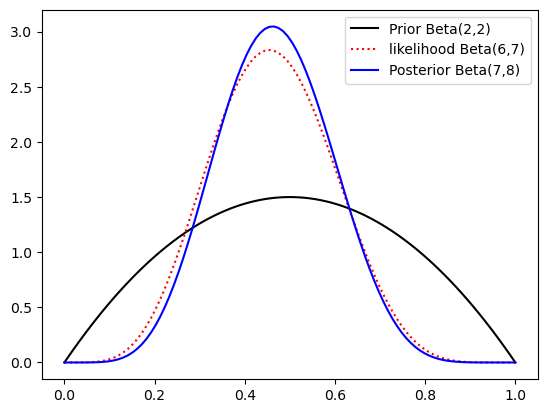

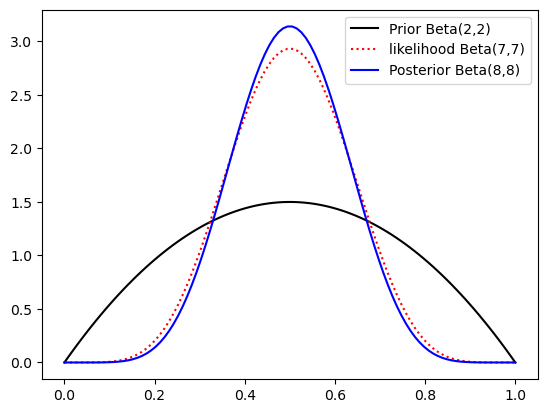

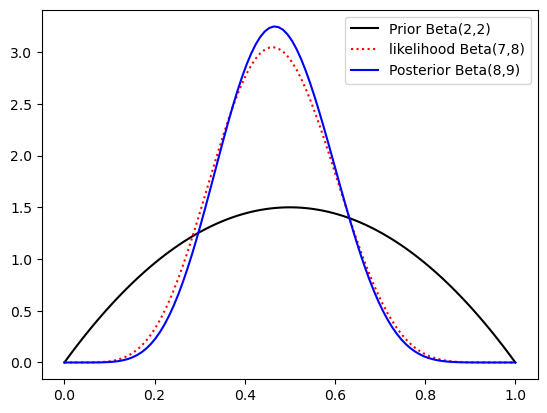

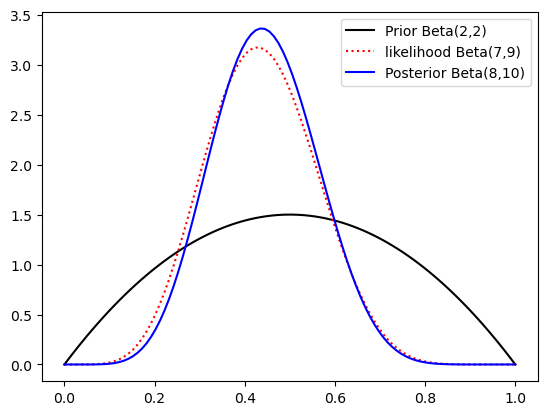

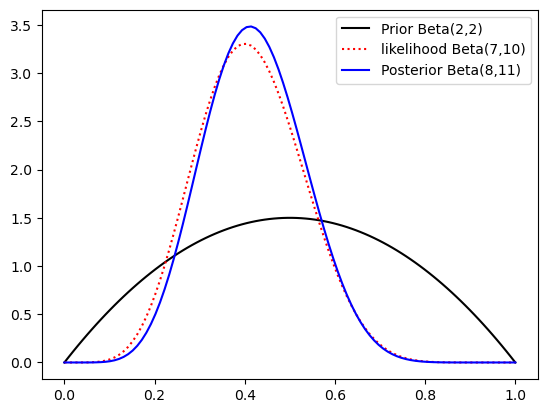

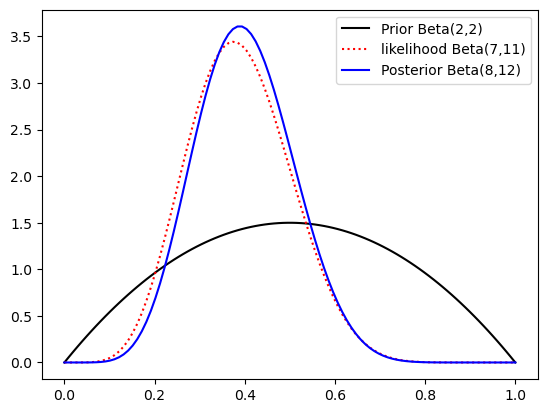

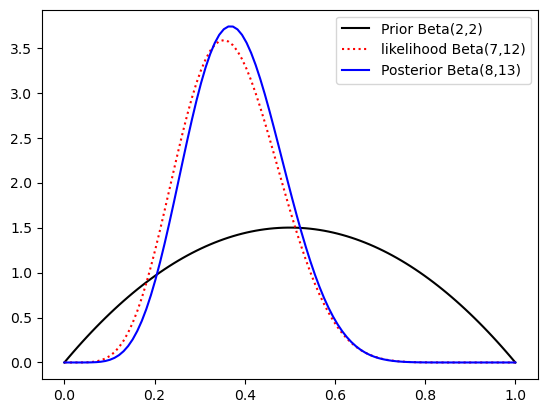

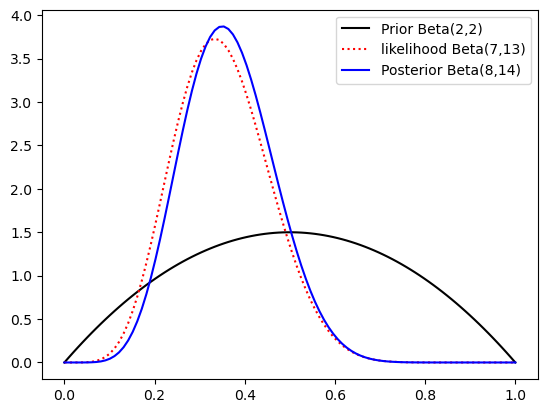

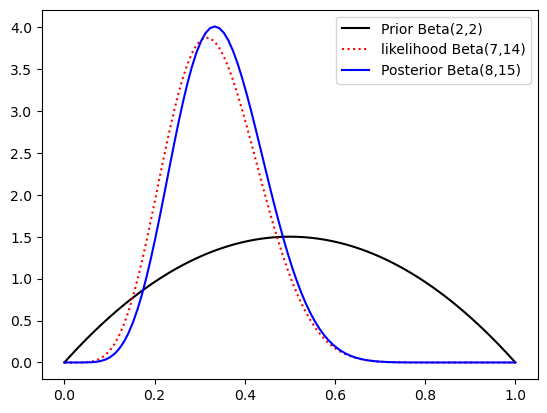

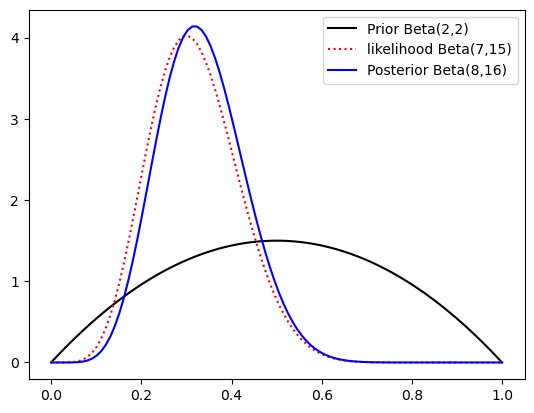

In [13]:
fig, ax = plt.subplots()
# Initial parameters
alpha, beta = 2, 2  # Prior belief
n0, n1 = 0, 0  # Initial number of tails and heads
num_tosses = 20 # Number of tosses to simulate

# Function to update the plot
def update():
    global n0, n1  # Keep track of heads and tails

    # Simulate a coin toss (1 = heads, 0 = tails)
    toss = np.random.choice([0, 1])
    if toss == 1:
        n1 += 1
    else:
        n0 += 1

    # Compute PDFs
    prior = get_pdf(x, alpha, beta)
    likelihood = get_pdf(x, n1+1, n0+1)
    posterior = scipy.stats.beta.pdf(x, alpha+n1, beta+n0)

    # Plot the prior and posterior
    plt.plot(x, prior, "black", label=f"Prior Beta({alpha},{beta})")
    plt.plot(x, likelihood, "r", linestyle="dotted", label=f"likelihood Beta({n1+1},{n0+1})")
    plt.plot(x, posterior, "b-", label=f"Posterior Beta({alpha+n1},{beta+n0})")
    plt.legend()
    plt.show()

for _ in range(num_tosses): update()